# Data Preprocessing 

## Importing the libraries

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Importing the dataset

In [295]:
df1 = pd.read_csv('real_estate_data.csv')

In [296]:
df2 = pd.read_csv('projects_data.csv')

### MERGE DATAFRAME

In [297]:
# Join hai DataFrame lại với nhau
merged_df = pd.merge(df1, df2, on='project_oid', how='inner')

In [298]:
# Hiển thị kết quả
merged_df.head()

,ad_id,list_id,list_time,date,account_id,projectid,project_oid,account_oid,account_name,state,...,street_name,area_v2,web_url,facilities_key,surrounding_key,investor_id,investor_name,paid_time,short_introduction_content,full_url_with_params
0,149173109,109212357,1.712927e+12,3 ngày trước,4735114,2464,1582239957,b144d70d0cf27d2fb85f9acec319e1ad,MR TOÀN,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
1,156266188,115304264,1.712549e+12,1 tuần trước,19890442,2464,1582239957,2ca66c644efc61538b5b8c566a7b3601,Phước Bình Land,accepted,...,Đường Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
2,156220843,115265512,1.712246e+12,2 tuần trước,9809355,2464,1582239957,9e980419635ca710ce81ced52d1fd372,DIEM,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
3,155978499,115057158,1.711619e+12,3 tuần trước,25481412,2464,1582239957,ed86d1bdfae46ca66407c9ea8588d034,Nguyễn Khắc Thành,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
4,155935060,115019801,1.711522e+12,3 tuần trước,3737279,2464,1582239957,569a0038167cba4a32f856190c415c76,Khanh,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...


### THU GIẢM DỮ LIỆU

In [299]:
# Loại bỏ cột không sử dụng
columns_to_drop = ['ad_id'
                   , 'list_id'
                   ,'list_time'
                   ,'date'
                   ,'account_id'
                   ,'account_oid'
                   ,'account_name'
                   ,'state'
                   ,'region_v2'
                   ,'type'
                   ,'price_string'
                   ,'escrow_can_deposit'
                   ,'params','paid_time'
                   ,'short_introduction_content'
                   ,'state'
                   ,'body'
                   ,'area'
                   ,'region'
                   ,'type'
                   ,'price_string'
                   ,'company_ad'
                   ,'region'
                   ,'ward'
                   ,'location'
                   ,'longitude'
                   ,'latitude'
                   ,'escrow_can_deposit'
                   ,'params'
                   ,'category'
                   ,'zero_deposit'
                   ,'web_url'
                   ,'short_introduction_content'
                   ,'full_url_with_params']
merged_df = merged_df.drop(columns=columns_to_drop)

In [300]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject    category_name  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...            Nhà ở   
1                                  Hàng ngộp cần bán gấp            Nhà ở   
2                                           kẹt tiền trả            Nhà ở   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...            Nhà ở   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...  Căn hộ/Chung cư   
...                                                  ...              ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn        

### Xử lý dữ liệu trùng lặp

In [301]:
# Đếm số lượng dữ liệu trùng lặp
duplicate_count = merged_df.duplicated().sum()

In [302]:
print(f"Số lượng dữ liệu trùng lặp trước khi xử lý: {duplicate_count}")

Số lượng dữ liệu trùng lặp trước khi xử lý: 75


In [303]:
# Xử lý dữ liệu trùng lặp
merged_df.drop_duplicates(inplace=True)

In [304]:
# Đếm số lượng dữ liệu trùng lặp sau khi xử lý
duplicate_count = merged_df.duplicated().sum()

In [305]:
print(f"Số lượng dữ liệu lặp sau xử lý: {duplicate_count}")

Số lượng dữ liệu lặp sau xử lý: 0


## Mã hoá dữ liệu (encoding)
Đây là quá trình chuyển đổi các giá trị chuỗi hoặc các giá trị phân loại thành các giá trị số để các mô hình học máy có thể hiểu và xử lý được.

In [306]:
# Lấy danh sách các cột chuỗi
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

In [307]:
# Hiển thị danh sách các cột chuỗi
print(categorical_columns)

['subject', 'category_name', 'area_name', 'region_name', 'ward_name', 'street_name', 'area_v2', 'facilities_key', 'surrounding_key', 'investor_name']


In [308]:
# Tạo đối tượng LabelEncoder
label_encoder = LabelEncoder()

In [309]:
# Tạo một DataFrame để lưu các cột đã mã hóa
encoded_df = merged_df.copy()

In [310]:
# Mã hóa từng cột chuỗi
for column in categorical_columns:
    encoded_df[column] = label_encoder.fit_transform(merged_df[column])

In [311]:
# Lưu DataFrame đã mã hóa vào file CSV mới
encoded_df.to_csv('data_encoded.csv', index=False)

In [312]:
# Gán lại DataFrame
merged_df = encoded_df

### Thay thế dữ liệu thiếu
Các tập dữ liệu thường chứa các giá trị thiếu, điều này có thể gây ra vấn đề cho các thuật toán học máy. Thay thế dữ liệu thiếu được gọi là bù đắp dữ liệu (data imputation).

In [313]:
for i in range(len(merged_df.columns)):
    missing_data = merged_df[merged_df.columns[i]].isna().sum()
    perc = missing_data / len(merged_df) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 0, percentage 0.00
>5,  missing entries: 0, percentage 0.00
>6,  missing entries: 2, percentage 0.02
>7,  missing entries: 1028, percentage 9.59
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 2, percentage 0.02
>11,  missing entries: 0, percentage 0.00
>12,  missing entries: 0, percentage 0.00
>13,  missing entries: 0, percentage 0.00
>14,  missing entries: 0, percentage 0.00
>15,  missing entries: 0, percentage 0.00
>16,  missing entries: 0, percentage 0.00


In [314]:
# Đếm số lượng giá trị thiếu trong mỗi cột
missing_values_count = merged_df.isnull().sum()

print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values_count)

Số lượng giá trị thiếu trong mỗi cột:
projectid                  0
project_oid                0
subject                    0
category_name              0
area_name                  0
region_name                0
price                      2
rooms                   1028
size                       0
ward_name                  0
price_million_per_m2       2
street_name                0
area_v2                    0
facilities_key             0
surrounding_key            0
investor_id                0
investor_name              0
dtype: int64


<Axes: >

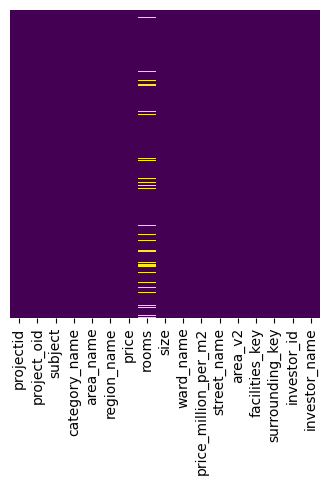

In [315]:
plt.figure(figsize = (4,4)) #hiển thị các giá trị thiếu trong tập dữ liệu
sns.heatmap(merged_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [316]:
# Điền giá trị trung bình cho các cột dữ liệu thiếu
merged_df['price'].fillna(merged_df['price'].mean(), inplace=True)
merged_df['rooms'].fillna(merged_df['rooms'].mean(), inplace=True)
merged_df['price_million_per_m2'].fillna(merged_df['price_million_per_m2'].mean(), inplace=True)

In [317]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid               0
project_oid             0
subject                 0
category_name           0
area_name               0
region_name             0
price                   0
rooms                   0
size                    0
ward_name               0
price_million_per_m2    0
street_name             0
area_v2                 0
facilities_key          0
surrounding_key         0
investor_id             0
investor_name           0
dtype: int64


In [318]:
# Danh sách các cột bạn muốn kiểm tra null
columns_to_check_null = ['ward_name', 'street_name', 'investor_name']  # Thay thế bằng tên của các cột bạn muốn kiểm tra null

# Loại bỏ dòng có giá trị null trong các cột đã chỉ định
merged_df = merged_df.dropna(subset=columns_to_check_null)


In [319]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid               0
project_oid             0
subject                 0
category_name           0
area_name               0
region_name             0
price                   0
rooms                   0
size                    0
ward_name               0
price_million_per_m2    0
street_name             0
area_v2                 0
facilities_key          0
surrounding_key         0
investor_id             0
investor_name           0
dtype: int64


In [320]:
print(merged_df)

       projectid  project_oid  subject  category_name  area_name  region_name  \
0           2464   1582239957     9670              1         23           42   
1           2464   1582239957     7654              1         23           42   
2           2464   1582239957     9874              1         23           42   
3           2464   1582239957     4218              1         23           42   
4           2464   1582239957     4460              0         23           42   
...          ...          ...      ...            ...        ...          ...   
10794       3931   1833333982     9643              3        125            2   
10795       4397   1312047912      473              3         11           36   
10796       4818    453709511     4372              0         64           36   
10797       4266   1964432767      430              1         43           11   
10798       4460   1786510809     4250              3         44           18   

              price     roo

### Xử lý giá trị nhiễu

In [321]:
merged_df.head(1)

,projectid,project_oid,subject,category_name,area_name,region_name,price,rooms,size,ward_name,price_million_per_m2,street_name,area_v2,facilities_key,surrounding_key,investor_id,investor_name
0,2464,1582239957,9670,1,23,42,2.000000e+09,2.0,100.0,376,20.0,507,23,136,90,378,186


In [322]:
def handle_outliers(df, column_name, threshold=1.5):
    """
    Xử lý giá trị nhiễu cho một cột trong DataFrame.

    Tham số:
    - df: DataFrame - DataFrame chứa dữ liệu.
    - column_name: str - Tên của cột cần xử lý.
    - threshold: float - Ngưỡng IQR, mặc định là 1.5.

    Trả về:
    - DataFrame: DataFrame đã được loại bỏ các giá trị nhiễu trong cột.
    """
    # Tính toán phạm vi IQR cho cột
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định số giá trị nhiễu trước khi lọc
    num_outliers_before = ((df[column_name] < (Q1 - threshold * IQR)) | (df[column_name] > (Q3 + threshold * IQR))).sum()

    
    # In số giá trị nhiễu trước khi lọc của cột
    print(f"Số giá trị nhiễu trước khi lọc của cột '{column_name}': {num_outliers_before}")
    
    # Xác định các điểm dữ liệu nhiễu
    outliers = (df[column_name] < (Q1 - threshold * IQR)) | (df[column_name] > (Q3 + threshold * IQR))

    # Loại bỏ các điểm dữ liệu nhiễu
    cleaned_df = df[~outliers]

    # Xác định số giá trị nhiễu trong cleaned data sau khi lọc
    num_outliers_cleaned = ((cleaned_df[column_name] < (Q1 - threshold * IQR)) | (cleaned_df[column_name] > (Q3 + threshold * IQR))).sum()
    print(f"Số giá trị nhiễu trong cleaned data sau khi lọc của cột '{column_name}': {num_outliers_cleaned}")
    print();

    return cleaned_df


In [323]:
# Loại bỏ các giá trị nhiễu
columns_to_handle = ["rooms"
                     , "price"
                     , "size"
                     , "price_million_per_m2"]

for column_name in columns_to_handle:
    merged_df = handle_outliers(merged_df, column_name)

Số giá trị nhiễu trước khi lọc của cột 'rooms': 3802
Số giá trị nhiễu trong cleaned data sau khi lọc của cột 'rooms': 0

Số giá trị nhiễu trước khi lọc của cột 'price': 563
Số giá trị nhiễu trong cleaned data sau khi lọc của cột 'price': 0

Số giá trị nhiễu trước khi lọc của cột 'size': 892
Số giá trị nhiễu trong cleaned data sau khi lọc của cột 'size': 0

Số giá trị nhiễu trước khi lọc của cột 'price_million_per_m2': 103
Số giá trị nhiễu trong cleaned data sau khi lọc của cột 'price_million_per_m2': 0



In [324]:
print(merged_df)

       projectid  project_oid  subject  category_name  area_name  region_name  \
0           2464   1582239957     9670              1         23           42   
1           2464   1582239957     7654              1         23           42   
6           2464   1582239957     9572              1         23           42   
10           284    405530665     2262              0         37           13   
11           284    405530665     1972              0         37           13   
...          ...          ...      ...            ...        ...          ...   
10787       3283   1327365846     4640              3         10           19   
10791       4271    382062794    10011              3         83           42   
10794       3931   1833333982     9643              3        125            2   
10795       4397   1312047912      473              3         11           36   
10796       4818    453709511     4372              0         64           36   

              price     roo

### Chuẩn hoá Min-Max:
Phương pháp chuẩn hoá Min-Max được sử dụng để chuyển đổi dữ liệu sao cho nó nằm trong một phạm vi đã cho, thường là từ 0 đến 1. Quy trình chuẩn hoá này giữ nguyên phân phối của dữ liệu ban đầu và giữ cho các giá trị được phân phối đều trong khoảng đã chọn.

In [325]:
# Tính giá trị nhỏ nhất và lớn nhất trong dữ liệu
max_value = merged_df.max().values
min_value = merged_df.min().values

In [326]:
print(max_value);
print(min_value);

[4.89600000e+03 2.14735312e+09 1.06050000e+04 3.00000000e+00
 1.27000000e+02 4.20000000e+01 5.71500000e+09 2.29084158e+00
 1.03000000e+02 4.27000000e+02 6.75675676e+01 1.26300000e+03
 1.27000000e+02 5.94000000e+02 2.29000000e+02 1.97500000e+03
 6.57000000e+02]
[2.00000000e+00 9.17300000e+04 3.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.17000000e+08 2.00000000e+00
 3.10000000e+01 0.00000000e+00 2.40384615e+00 0.00000000e+00
 0.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00]


In [327]:

# Chuẩn hoá dữ liệu bằng Min-Max
merged_df_min_max = (merged_df - min_value) / (max_value - min_value)

In [328]:
print("Dữ liệu sau khi chuẩn hoá Min-Max:")
print(merged_df_min_max.head())

Dữ liệu sau khi chuẩn hoá Min-Max:
    projectid  project_oid   subject  category_name  area_name  region_name  \
0    0.503065     0.736821  0.911809       0.333333   0.181102     1.000000   
1    0.503065     0.736821  0.721656       0.333333   0.181102     1.000000   
6    0.503065     0.736821  0.902566       0.333333   0.181102     1.000000   
10   0.057622     0.188817  0.213073       0.000000   0.291339     0.309524   
11   0.057622     0.188817  0.185720       0.000000   0.291339     0.309524   

       price  rooms      size  ward_name  price_million_per_m2  street_name  \
0   0.336370    0.0  0.958333   0.880562              0.270030     0.401425   
1   0.354234    0.0  0.958333   0.880562              0.285376     0.838480   
6   0.273848    0.0  0.958333   0.880562              0.216319     0.401425   
10  0.625759    0.0  0.555556   0.962529              0.745539     0.595408   
11  0.497142    0.0  0.347222   0.962529              0.757812     0.595408   

     area_v2  f

### Thu giảm số chiều dữ liệu
Thu giảm số chiều dữ liệu (dimensionality reduction) là quá trình giảm số lượng biến độc lập (chiều) trong tập dữ liệu mà không gây mất mát thông tin quan trọng. Quá trình này thường được áp dụng để giảm bớt sự phức tạp của dữ liệu, giảm thiểu chi phí tính toán và tăng hiệu suất của các mô hình máy học

In [329]:
# Tạo ma trận tương quan
corr_matrix = merged_df.corr()

In [330]:
# Chọn ngưỡng tương quan
threshold = 1

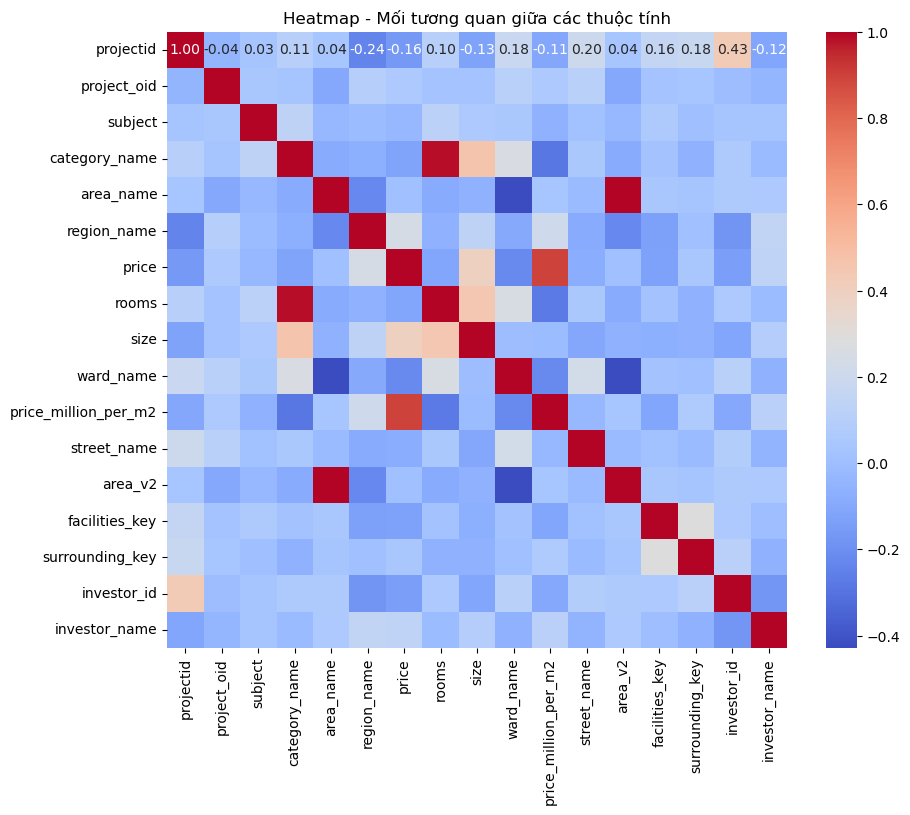

In [331]:
# Đồ thị heatmap thể hiện sự mối tương quan của các thuộc tính.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Mối tương quan giữa các thuộc tính')
plt.show()

In [332]:
# Xác định cột có tương quan cao
high_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_cols.add(colname_i)
            high_corr_cols.add(colname_j)

In [333]:
# Loại bỏ các cột có tương quan cao
merged_df = merged_df.drop(high_corr_cols, axis=1)

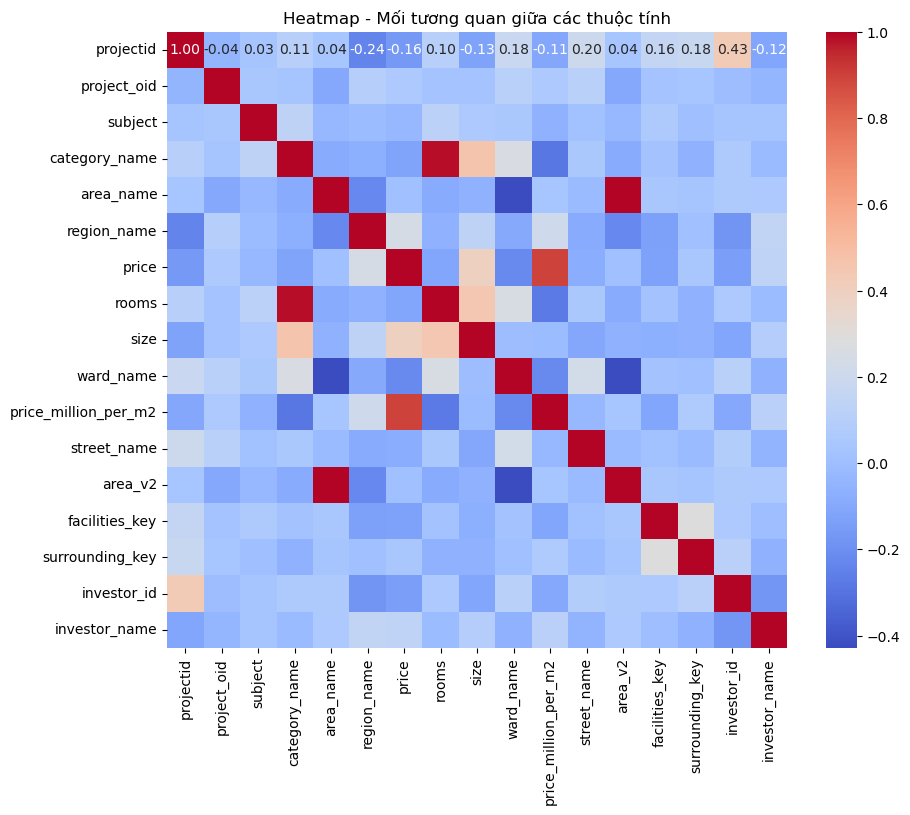

In [334]:
# Đồ thị heatmap thể hiện sự mối tương quan của các thuộc tính.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Mối tương quan giữa các thuộc tính')
plt.show()

In [337]:
merged_df.to_csv("real_estate_processed.csv")

## Mã hóa dữ liệu phân loại
#### Mã hóa biến độc lập (X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Giả sử 'df' là DataFrame chứa tập dữ liệu
# Xác định các cột cần mã hoá
columns_to_encode = ['subject', 'category_name', 'area_name', 'region_name', 
                     'ward_name', 'street_name', 'area_v2', 'facilities_key', 
                     'surrounding_key', 'investor_id', 'investor_name']

# Định nghĩa ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), columns_to_encode)], 
    remainder='passthrough'
)

# Fit và transform DataFrame
X_encoded = ct.fit_transform(merged_df)

# Chuyển kết quả thành DataFrame nếu cần
X_encoded_df = pd.DataFrame(X_encoded)


In [ ]:
X_encoded_df.head()

#### Mã hóa biến phụ thuộc (Y)

In [ ]:
# Do biến price là biến liên tục nên ko cần mã hoá ^^
# Gán biến phụ thuộc Y
Y = merged_df['price']

In [ ]:
print(Y)

# Splitting the dataset (X = data, y = output) into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Chuẩn hóa Đặc trưng (Feature scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)